# Spam classification on the spambase dataset
The purpose of this model is to create a classifier for marking e-mails as spam. The data is sourced from the Spambase dataset available on many machine learning dataset platforms (ie. https://archive.ics.uci.edu/ml/datasets/spambase). The class attribute is whether the e-mail was spam (1) or not (0). Other attributes used for predictions are the frequencies of certain words or characters.

In [4]:
import numpy as np
import pandas as pd

random_seed = 5042021
np.random.seed(random_seed)

all_data = pd.read_csv('dataset_44_spambase.csv')



Check the columns of the dataset.

In [5]:
all_data[:2]

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_%3B,char_freq_%28,char_freq_%5B,char_freq_%21,char_freq_%24,char_freq_%23,capital_run_length_average,capital_run_length_longest,capital_run_length_total,class
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.0,0.00,...,0.0,0.000,0.0,0.778,0.00,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.0,0.94,...,0.0,0.132,0.0,0.372,0.18,0.048,5.114,101,1028,1


In [6]:
len(all_data.index)

4601

In [7]:
len(all_data[all_data["class"]==1])

1813

In [8]:
len(all_data[all_data["class"]==0])

2788

## Data preprocessing

First, we check whether we have any null values in our dataset.

In [9]:
all_data.isnull().sum()

word_freq_make                0
word_freq_address             0
word_freq_all                 0
word_freq_3d                  0
word_freq_our                 0
word_freq_over                0
word_freq_remove              0
word_freq_internet            0
word_freq_order               0
word_freq_mail                0
word_freq_receive             0
word_freq_will                0
word_freq_people              0
word_freq_report              0
word_freq_addresses           0
word_freq_free                0
word_freq_business            0
word_freq_email               0
word_freq_you                 0
word_freq_credit              0
word_freq_your                0
word_freq_font                0
word_freq_000                 0
word_freq_money               0
word_freq_hp                  0
word_freq_hpl                 0
word_freq_george              0
word_freq_650                 0
word_freq_lab                 0
word_freq_labs                0
word_freq_telnet              0
word_fre

No null values are present.

## Train-test split

First off, we are using a train test split of size 0.3.

In [10]:
from sklearn.model_selection import train_test_split

predictors = all_data.columns.values.tolist()
predictors.remove('class')

X = all_data[predictors].values
y = all_data['class'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=random_seed)

In [11]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
# define grid
parametergrid= {"criterion" : ("gini", "entropy"),"max_depth":(1,2,3,4,5,6,7,8,9,10),"min_samples_leaf":(1,2,3,4,5,6,7,8,9,10)
}
# random_state ensures replicability
clf = GridSearchCV(DecisionTreeClassifier(random_state=42), parametergrid)
#this may take a while
clf.fit(X_train, y_train)
# returns the best model
clf.best_estimator_
# the best parameters
clf.best_params_
# results obtained by the best model - the average of all cv folds for a single combination of the parameters
clf.best_score_ 

0.9093167701863354

In [12]:
print(clf.best_estimator_)


DecisionTreeClassifier(criterion='entropy', max_depth=9, random_state=42)


In [13]:
def confusion_matrix_values(cm):
    print('True positive = ', cm[0][0])
    print('False positive = ', cm[0][1])
    print('False negative = ', cm[1][0])
    print('True negative = ', cm[1][1])

y_pred_lr = clf.predict(X_test)
y_pred_dt = clf.predict(X_test)

# Confusion Matrix
from sklearn.metrics import confusion_matrix
cm_lr = confusion_matrix(y_test, y_pred_lr)
cm_lr
confusion_matrix_values(cm_lr)
cm_dt = confusion_matrix(y_test, y_pred_dt)
cm_dt
confusion_matrix_values(cm_dt)
# Accuracy = (TP + TN) / (TP + TN + FP + FN)
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred_lr)
accuracy_score(y_test, y_pred_dt)

True positive =  790
False positive =  41
False negative =  64
True negative =  486
True positive =  790
False positive =  41
False negative =  64
True negative =  486


0.9239681390296887

In [14]:
from sklearn import tree
from matplotlib import pyplot as plt

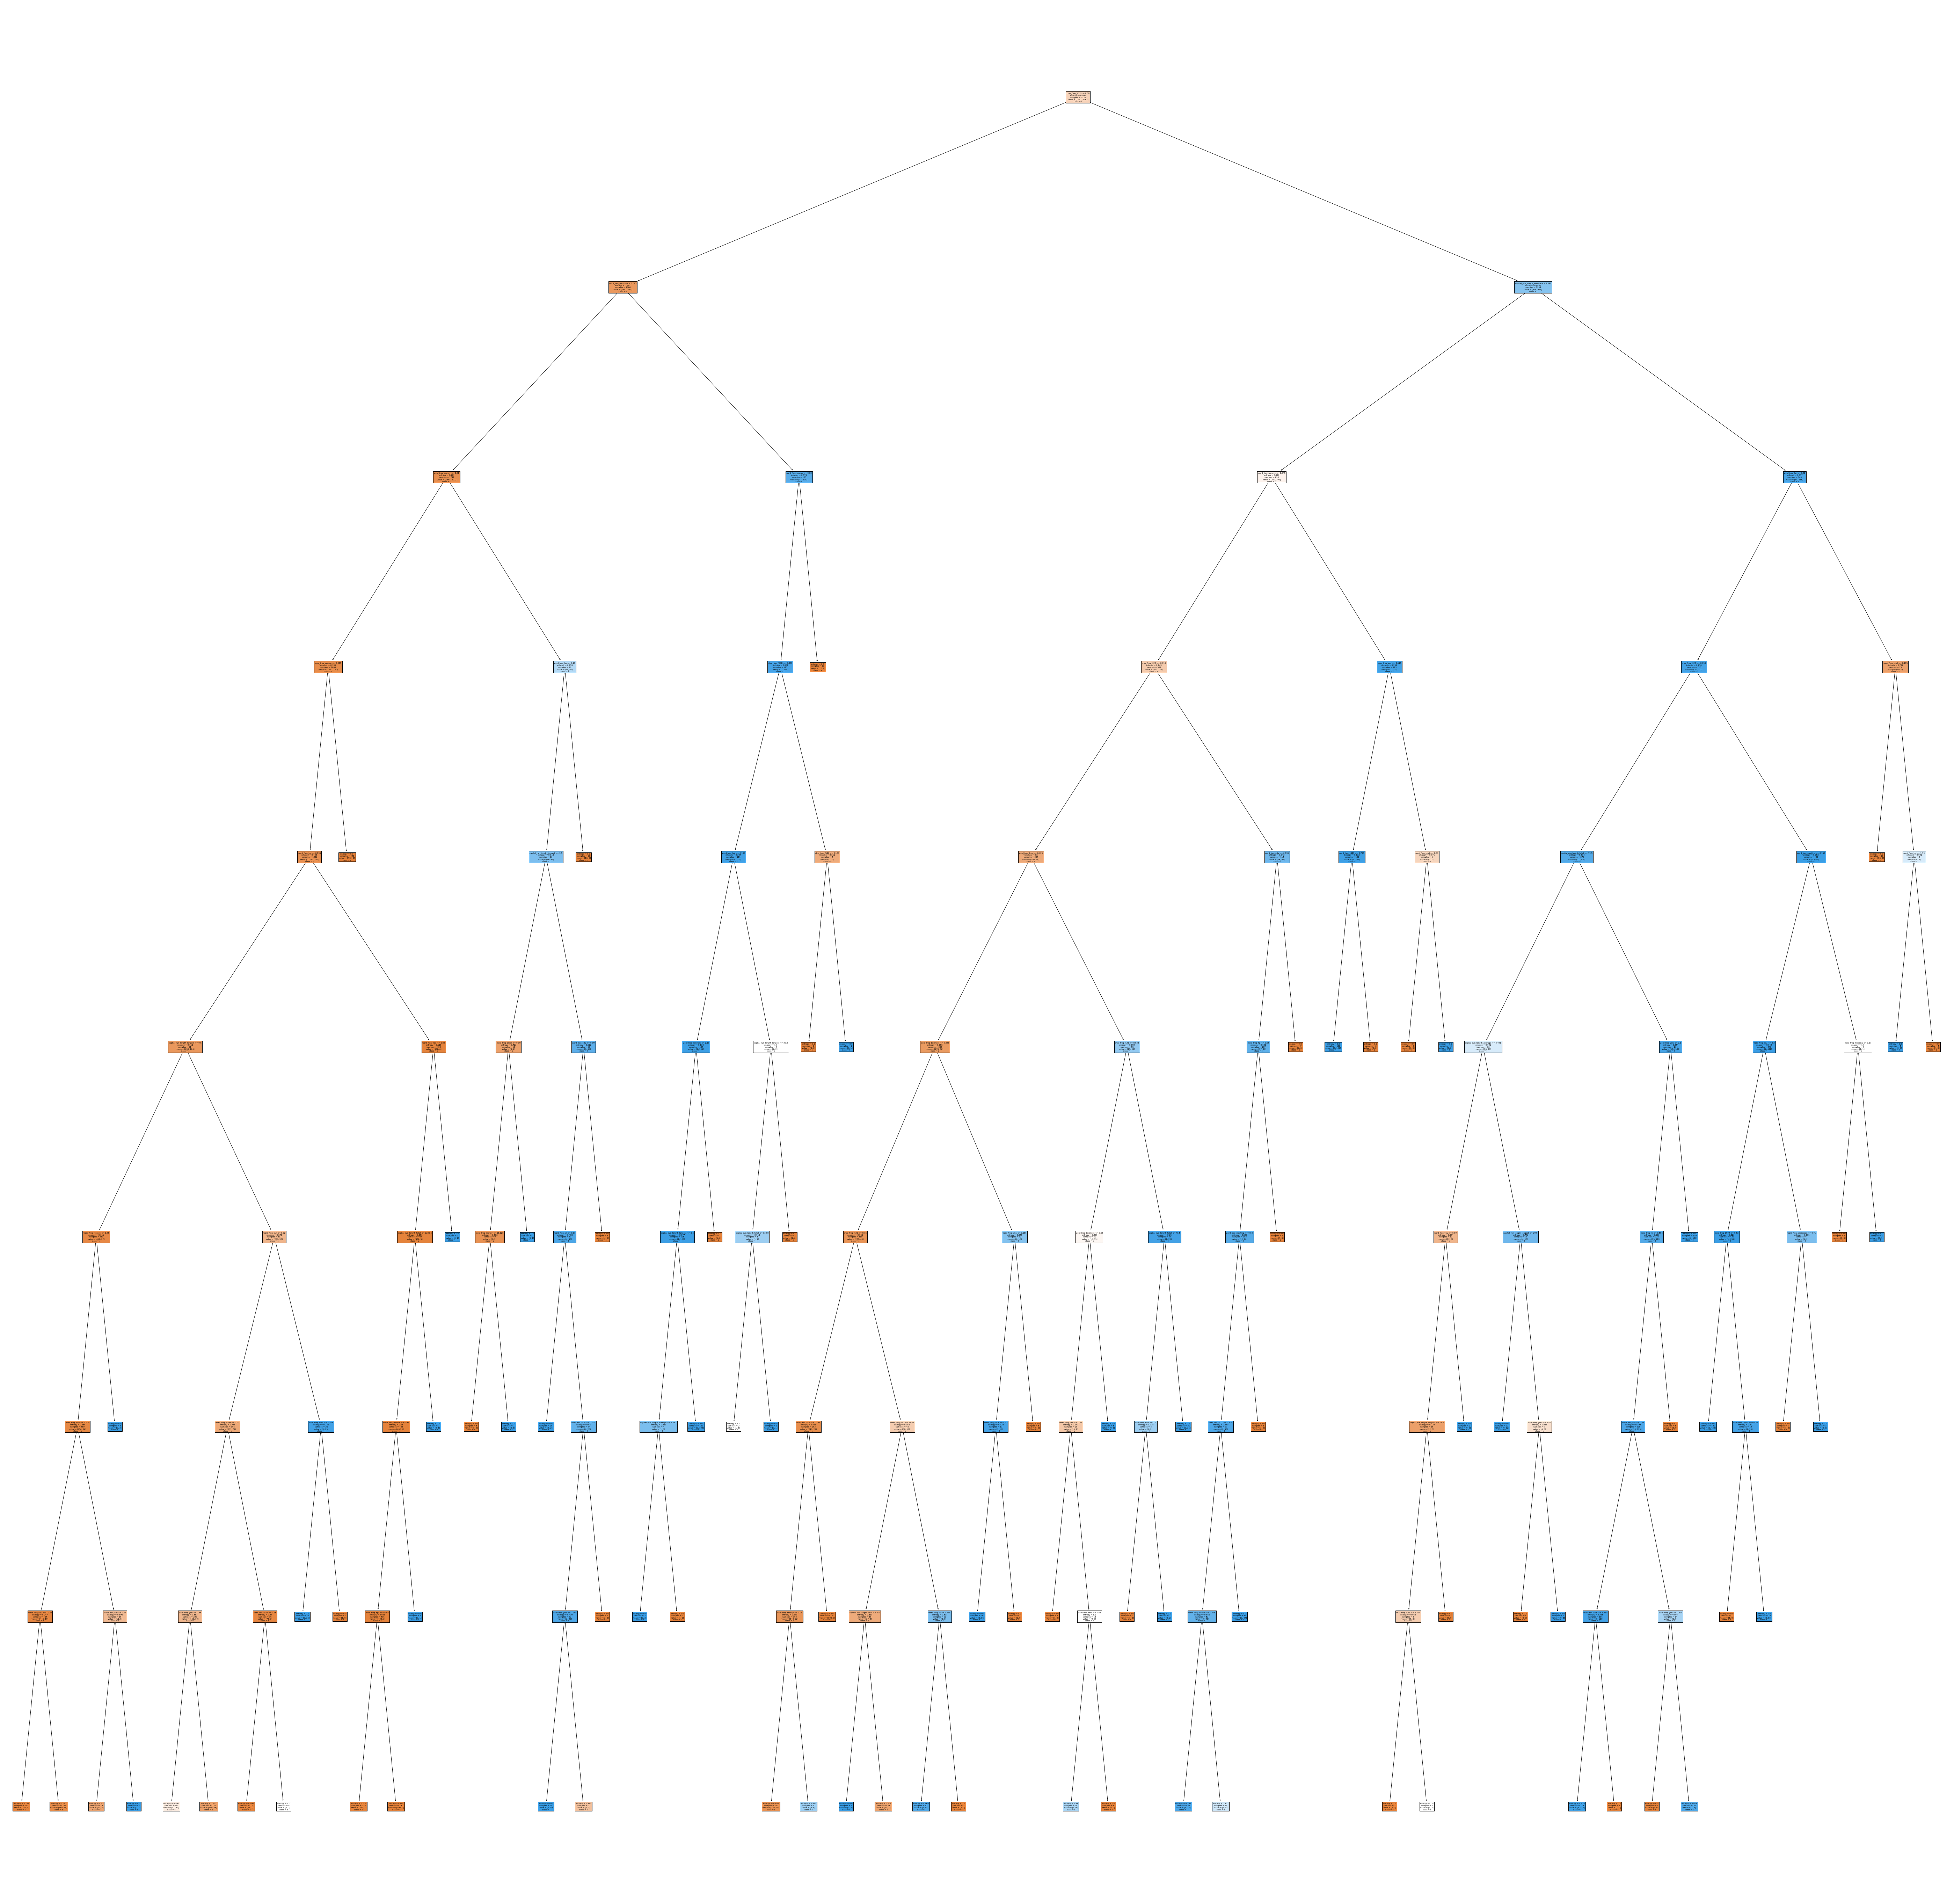

In [20]:
fig = plt.figure(figsize=(100,100))
_ = tree.plot_tree(clf.best_estimator_, 
                   feature_names=predictors,  
                   class_names="class",
                   filled=True)


In [18]:
fig.savefig("decistion_tree2.png")